# Here I'm analysing the Adult income dataset

# About Dataset

# An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education 
level, age, gender, occupation, and etc.

# This is a widely cited KNN dataset. I encountered it during my course, and I wish to share it here because 
it is a good starter example for data pre-processing and machine learning practices.

Fields
The dataset contains 16 columns
Target filed: Income
-- The income is divide into two classes: <=50K and >50K
Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information. '''



# Import Libraries

In [1]:
import pandas as pd


In [ ]:
pip --version

In [ ]:
pip install --upgrade pip

In [ ]:
!python -m ensurepip --upgrade


In [ ]:
pip --version

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [ ]:
data = pd.read_csv("adult.csv")
data

# Display first 10 rows

In [ ]:
data.head(10)

# Display last 10 rows

In [ ]:
data.tail(10)

# Find shape of Dataset

In [ ]:
data.shape

In [ ]:
print("Rows=", data.shape[0])
print("Column", data.shape[1])

# Get info of the dataset

In [ ]:
data.info()

# Fetch Random  samples from the dataset (50%)

In [ ]:
sample_data = data.sample(frac=0.50, random_state=100)
sample_data

# Check Null values in the original Dataset

In [ ]:
data.isnull().sum(axis=0) #column wise

In [ ]:
# check row wise
data.isnull().sum(axis=1)

In [ ]:
# lets check using graphs 

sns.heatmap(data.isna())

In [19]:
# So no null values in the map also, if any null values map will show with different colour

# Perform   data cleaning [Replace '?'  with NaN]

In [ ]:
data[data == '?']

In [ ]:
#lets check the ? in how many places
data.isin(["?"]).sum()

In [ ]:
# lets replace the value with NAN
data.columns

In [23]:
import numpy as np
data["workclass"] = data["workclass"].replace('?', np.nan)
data["occupation"] = data["occupation"].replace('?', np.nan)
data["native-country"] = data["native-country"].replace('?', np.nan)

In [ ]:
data.isin(['?']).sum()

In [ ]:
data.isnull().sum()

In [ ]:
sns.heatmap(data.isnull())

In [27]:
# The above graph showing white lines says we have null values 
# so lets drop the null values

# Drop the missing values

In [28]:
per_data = data.isnull().sum()*100/len(data) #here I'm finding the percentage of the null values in the dataset

In [ ]:
per_data

In [ ]:
data.dropna(how='any',inplace=True)
data.shape

# Check for duplicate data and drop them

In [31]:
# check if we have any duplicates 
dup_data = data.duplicated().any()

In [ ]:
print("Do we have any duplicates", dup_data)

In [33]:
# let drop the duplicates 
data = data.drop_duplicates()

In [ ]:
data.shape

In [ ]:
print("The total dropped count is",45222-45175)

# Overall statstics of the dataset

In [ ]:
data.describe()

In [ ]:
data.describe(include='all')

In [ ]:
data["education"].unique()

In [ ]:
data["educational-num"].unique()

In [40]:
# in the dataset "capital-gain" & "capital-loss" 75%values is zero so dropping


# Drop the educational-num,capital-loss,capital-gain

In [ ]:
data.columns

In [42]:
# Use drop() when you know the specific rows or columns to remove by their labels (index or column names).
# Use dropna() when you want to remove rows or columns with missing (NaN) values, without specifying exact labels.

In [43]:
data = data.drop(['educational-num','capital-gain','capital-loss'], axis=1)


In [ ]:
data.columns

# What is the Univariate Analysis

In [ ]:
# 1. What is the Distribution of Age column by 
data.columns

In [ ]:
# In univariate analysis we can only perform by suing single values 

data["age"].describe()

In [ ]:
data["age"].mean()

In [ ]:
plt.hist(data["age"], bins=20,color='green')
plt.xlabel('Age')
plt.legend('AGE')
plt.title('Unvariate Analysis')
plt.show()

# FIND THE total no.of persons having age between 17 to 48 (include) using between method

In [ ]:
sum((data["age"]>=17) & (data["age"]<=48))

In [ ]:
sum(data['age'].between(17,48))

# What is the distribution od Workclass Column

In [ ]:
data.columns

In [ ]:
data["workclass"]

In [ ]:
data["workclass"].describe()

In [ ]:
plt.figure(figsize=(9,5))
plt.hist(data["workclass"])

# How many persons having bachelors or master degrees 

In [ ]:
data.columns

In [ ]:
data[(data['education'] == 'Masters') | (data["education"]=='Bachelors')]

In [ ]:
# Another method

data[data["education"].isin(["Bachelors","Masters"])]

In [ ]:
len(data[data["education"].isin(["Bachelors","Masters"])])

# Bivariate Analysis

In [ ]:
data.columns

/var/folders/n4/9fb88mxd4g56nzmtw5s0l00c0000gn/T/ipykernel_4470/1251379830.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='age', data=data, palette='Set2')


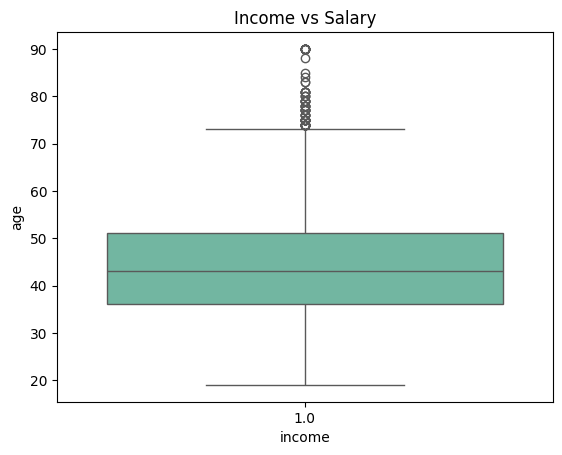

In [100]:
sns.boxplot(x='income', y='age', data=data, palette='Set2')
plt.title("Income vs Salary")
plt.show()

In [61]:
# above the plot saying the young people people salary is <=50K & senior people income is >=50K

# Replace salary values <=50k & >=50k with 0 & 1

In [ ]:
data.columns

In [ ]:
data["income"]

In [75]:
data["income"].unique()

array(['<=50K', 1], dtype=object)

In [ ]:
data["income"].value_counts()

/var/folders/n4/9fb88mxd4g56nzmtw5s0l00c0000gn/T/ipykernel_4470/3632151801.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=data, palette='Set2')


<Axes: xlabel='income', ylabel='count'>

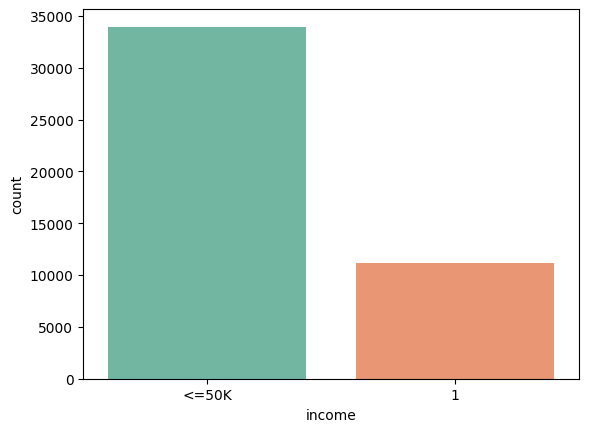

In [76]:
sns.countplot(x='income', data=data, palette='Set2')

# which work class getting the higest salary 

In [77]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income', 'Encode income'],
      dtype='object')

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45175 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45175 non-null  int64 
 1   workclass       45175 non-null  object
 2   fnlwgt          45175 non-null  int64 
 3   education       45175 non-null  object
 4   marital-status  45175 non-null  object
 5   occupation      45175 non-null  object
 6   relationship    45175 non-null  object
 7   race            45175 non-null  object
 8   gender          45175 non-null  object
 9   hours-per-week  45175 non-null  int64 
 10  native-country  45175 non-null  object
 11  income          45175 non-null  object
 12  Encode income   0 non-null      object
dtypes: int64(3), object(10)
memory usage: 4.8+ MB


In [80]:
data["income"]= pd.to_numeric(data["income"], errors="coerce")

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45175 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45175 non-null  int64  
 1   workclass       45175 non-null  object 
 2   fnlwgt          45175 non-null  int64  
 3   education       45175 non-null  object 
 4   marital-status  45175 non-null  object 
 5   occupation      45175 non-null  object 
 6   relationship    45175 non-null  object 
 7   race            45175 non-null  object 
 8   gender          45175 non-null  object 
 9   hours-per-week  45175 non-null  int64  
 10  native-country  45175 non-null  object 
 11  income          11202 non-null  float64
 12  Encode income   0 non-null      object 
dtypes: float64(1), int64(3), object(9)
memory usage: 4.8+ MB


In [83]:
data.groupby('workclass')['income'].mean().sort_values(ascending=False)

workclass
Federal-gov         1.0
Local-gov           1.0
Private             1.0
Self-emp-inc        1.0
Self-emp-not-inc    1.0
State-gov           1.0
Without-pay         1.0
Name: income, dtype: float64

# Better chances to get salary >50K male or female 

In [86]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income', 'Encode income'],
      dtype='object')

In [87]:
data.groupby('gender')['income'].mean()

gender
Female    1.0
Male      1.0
Name: income, dtype: float64

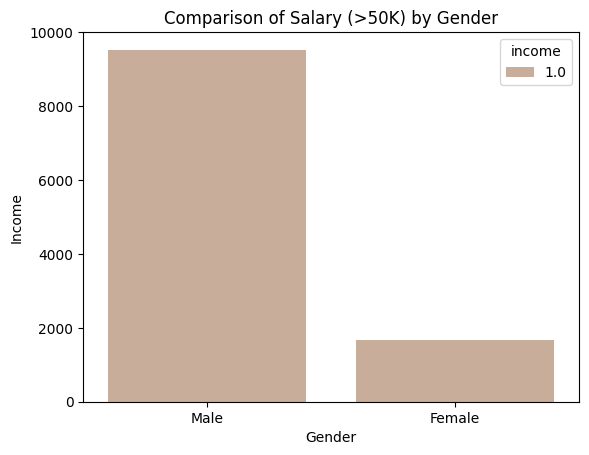

In [99]:
sns.countplot(x='gender', hue='income', data=data, palette='pink')
# Set labels and title
plt.title('Comparison of Salary (>50K) by Gender')
plt.xlabel('Gender')
plt.ylabel('Income')
# plt.xticks([0, 1], ['Male', 'Female'], rotation=0)
plt.show()

In [98]:
data.isnull().sum()

age                   0
workclass             0
fnlwgt                0
education             0
marital-status        0
occupation            0
relationship          0
race                  0
gender                0
hours-per-week        0
native-country        0
income            33973
Encode income     45175
dtype: int64

# Covert workclass columns datatype  to Category datatype

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45175 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45175 non-null  int64  
 1   workclass       45175 non-null  object 
 2   fnlwgt          45175 non-null  int64  
 3   education       45175 non-null  object 
 4   marital-status  45175 non-null  object 
 5   occupation      45175 non-null  object 
 6   relationship    45175 non-null  object 
 7   race            45175 non-null  object 
 8   gender          45175 non-null  object 
 9   hours-per-week  45175 non-null  int64  
 10  native-country  45175 non-null  object 
 11  income          11202 non-null  float64
 12  Encode income   0 non-null      object 
dtypes: float64(1), int64(3), object(9)
memory usage: 4.8+ MB


In [94]:
data["workclass"] = data["workclass"].astype('category')

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45175 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45175 non-null  int64   
 1   workclass       45175 non-null  category
 2   fnlwgt          45175 non-null  int64   
 3   education       45175 non-null  object  
 4   marital-status  45175 non-null  object  
 5   occupation      45175 non-null  object  
 6   relationship    45175 non-null  object  
 7   race            45175 non-null  object  
 8   gender          45175 non-null  object  
 9   hours-per-week  45175 non-null  int64   
 10  native-country  45175 non-null  object  
 11  income          11202 non-null  float64 
 12  Encode income   0 non-null      object  
dtypes: category(1), float64(1), int64(3), object(8)
memory usage: 4.5+ MB
